In [1]:
import os
import os
if 'jbook' in os.getcwd():
    os.chdir(os.path.abspath(os.path.join("../../../..")))

import numpy as np
import cv2
import matplotlib.pyplot as plt
from myst_nb import glue

from bcd.preprocess.image.threshold import (ThresholdAnalyzer,
    ThresholdLi, ThresholdISOData, ThresholdTriangle, ThresholdOTSU, ThresholdAdaptiveMean, ThresholdAdaptiveGaussian, ThresholdManual, ThresholdYen, ThresholdTriangleAnalyzer
)
from bcd.utils.visual import plot_images

img1 = "data/image/1_dev/converted/train/benign/347c2455-cb62-40f8-a173-9e4eb9a21902.png"
img2 = "data/image/1_dev/converted/train/benign/4ed91643-1e06-4b2c-8efb-bc60dd9e0313.png"
img3 = "data/image/1_dev/converted/train/malignant/7dcc12fd-88f0-4048-a6ab-5dd0bd836f08.png"
img4 = "data/image/1_dev/converted/train/malignant/596ef5db-9610-4f13-9c1a-4c411b1d957c.png"

img1 = cv2.imread(img1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2, cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread(img3, cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread(img4, cv2.IMREAD_GRAYSCALE)

images = (img1,img2,img3,img4)

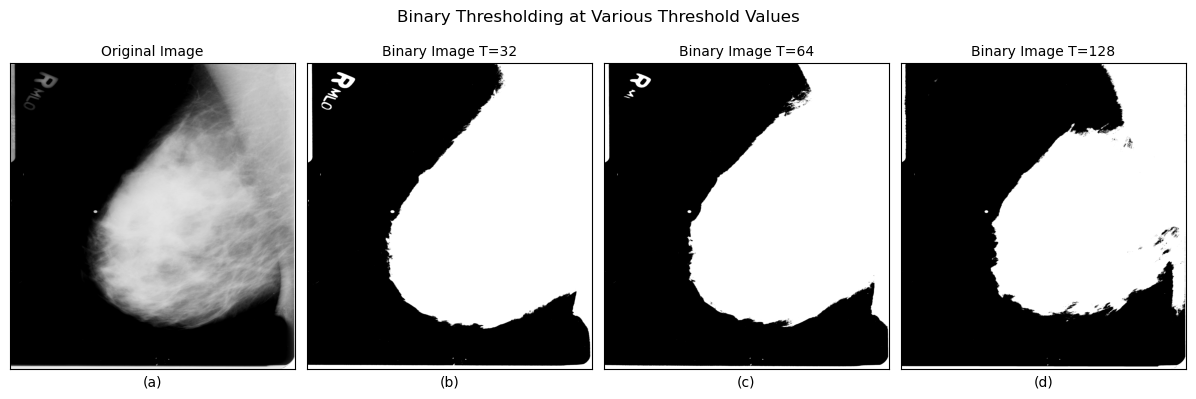

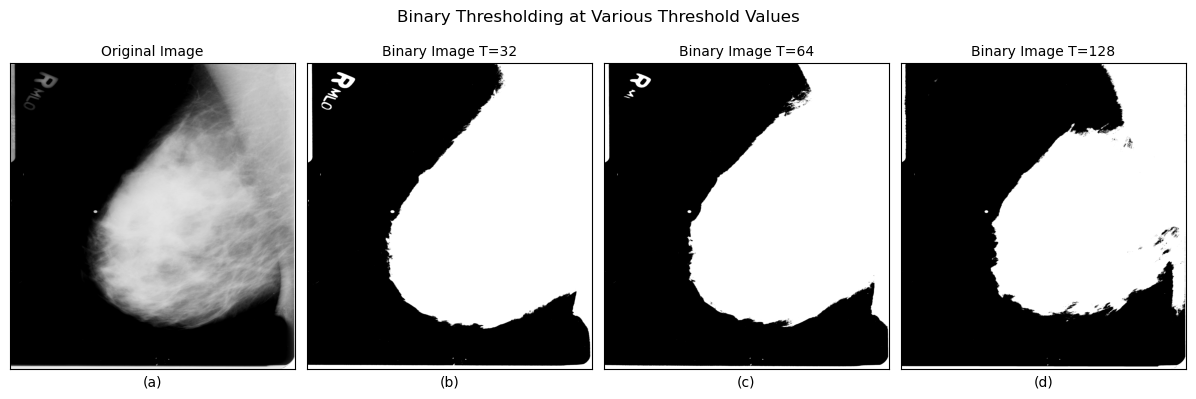

In [2]:
def plot_binary_images(image: np.ndarray, thresholds: list):
    thresholds = [32,64,128]
    images = [img3]
    for t in thresholds:
        _, img = cv2.threshold(img3, thresh=t, maxval=np.max(img3), type=cv2.THRESH_BINARY)
        images.append(img)
    titles = [f"Binary Image T={t}" for t in thresholds]
    titles = ["Original Image"] + titles
    title = "Binary Thresholding at Various Threshold Values"
    return plot_images(images=images, titles=titles, title=title)

thresholds = [32,64,128]
fig = plot_binary_images(image=img3, thresholds=thresholds)
glue("various_thresholds", fig)

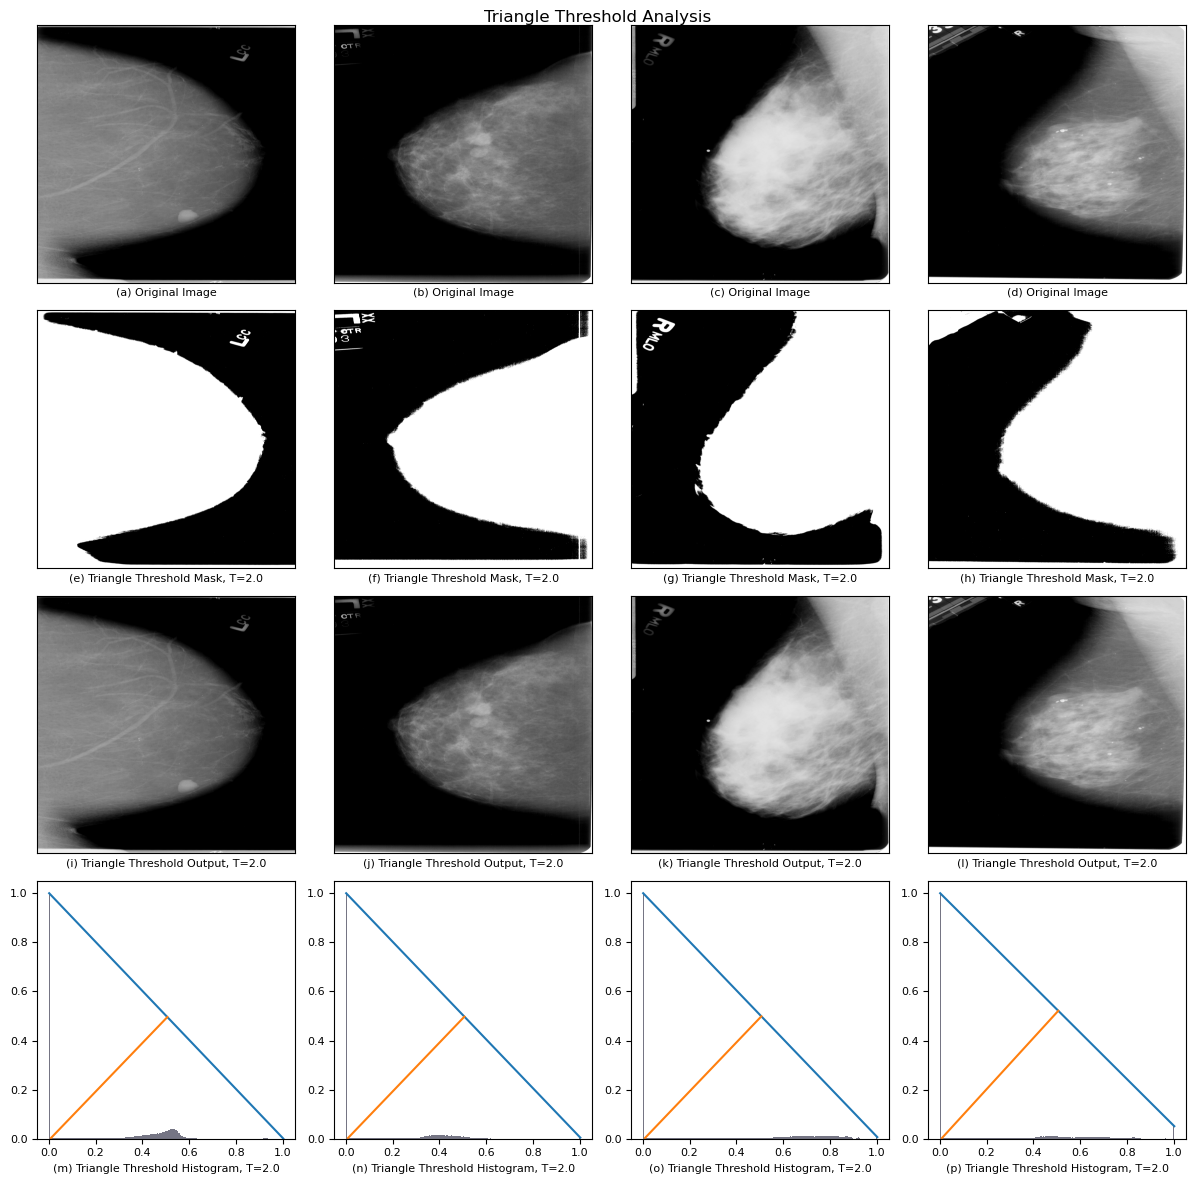

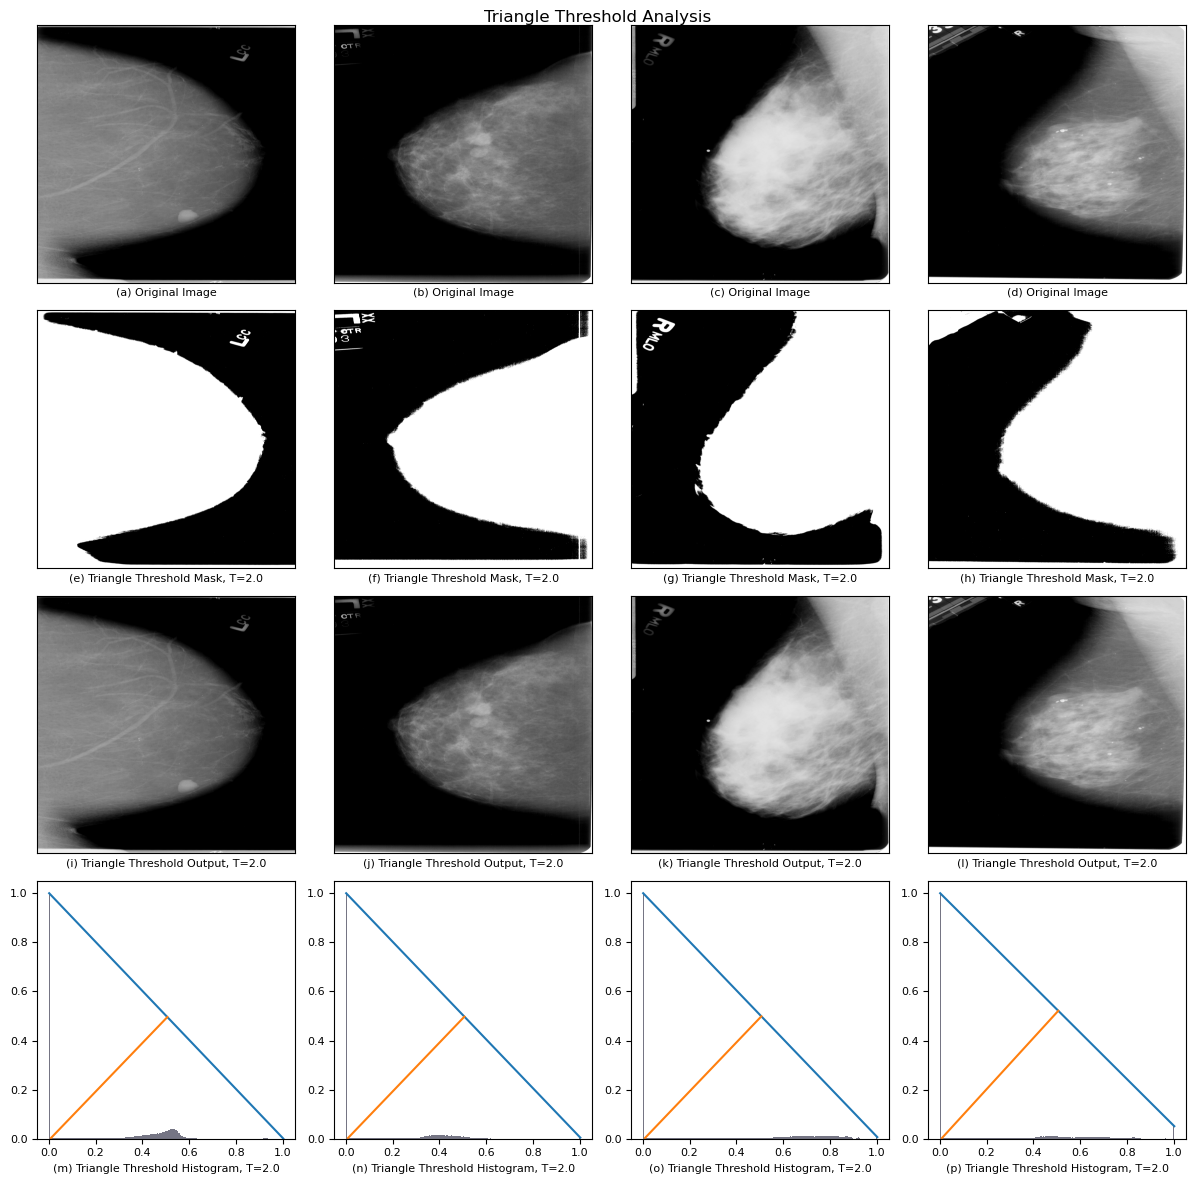

In [3]:
analyzer = ThresholdTriangleAnalyzer()
threshold = ThresholdTriangle()
fig = analyzer.analyze(images=images, threshold=threshold)

glue("threshold_triangle", fig)

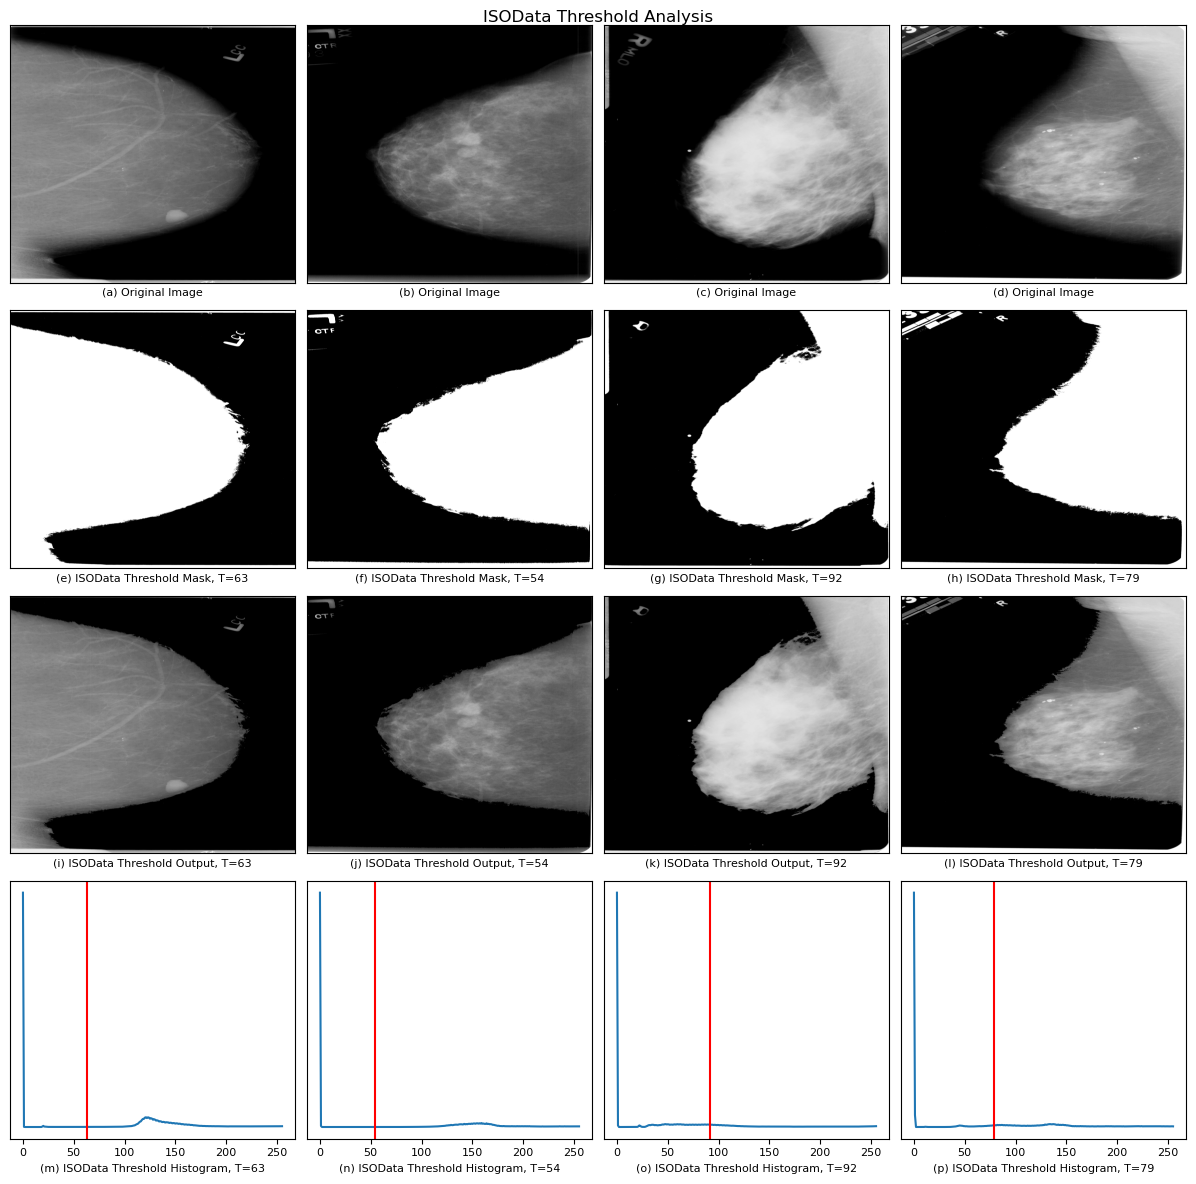

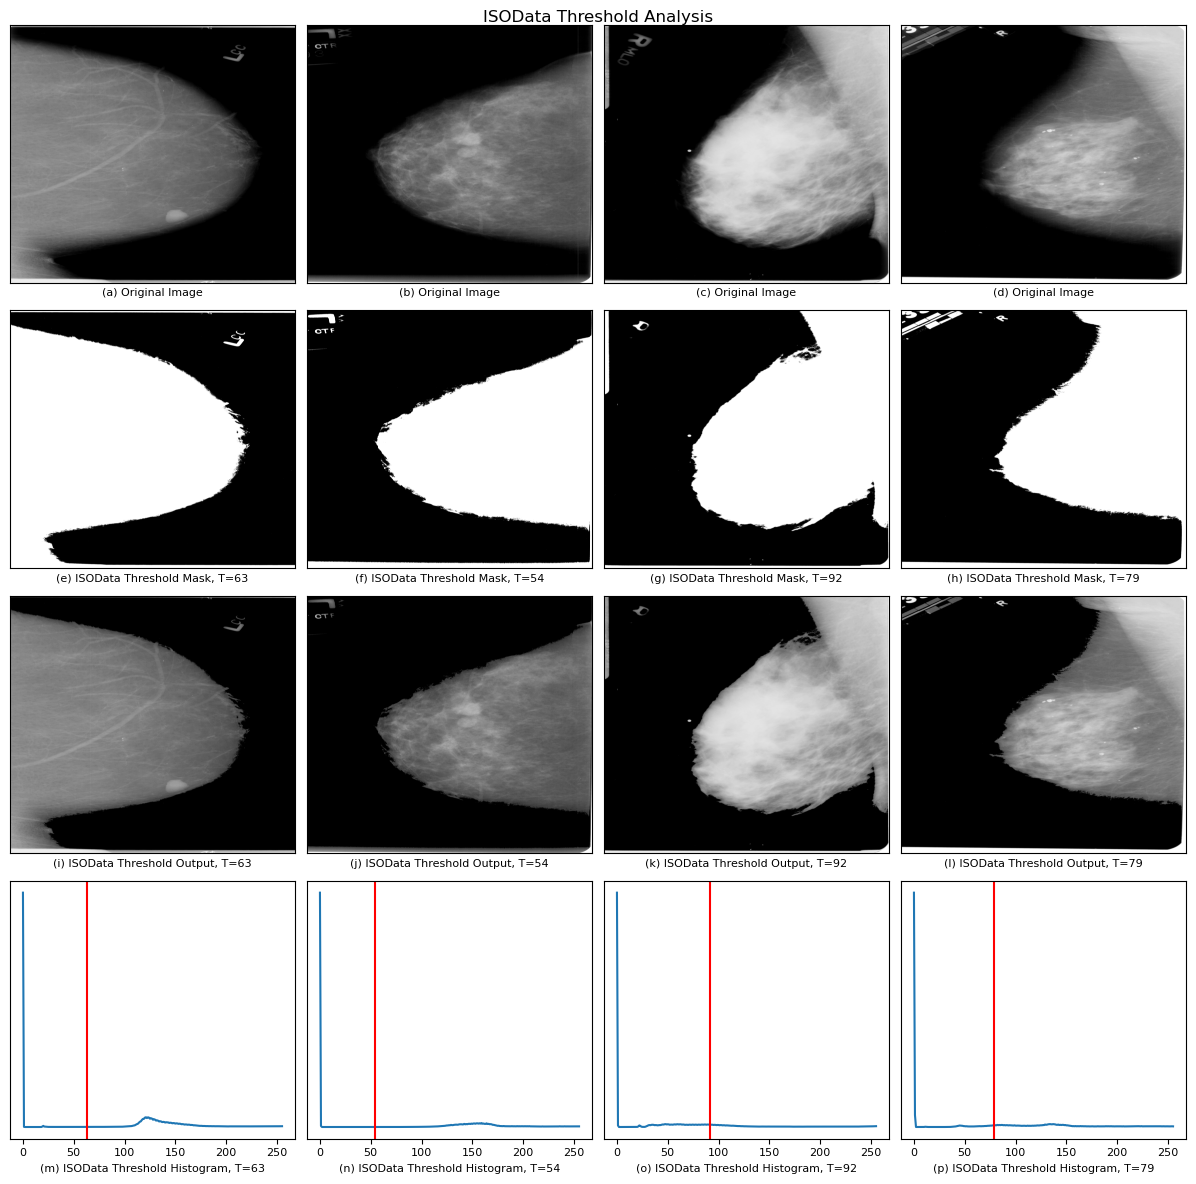

In [4]:
analyzer = ThresholdAnalyzer()
threshold = ThresholdISOData()
fig = analyzer.analyze(images=images, threshold=threshold)

glue("threshold_isodata", fig)

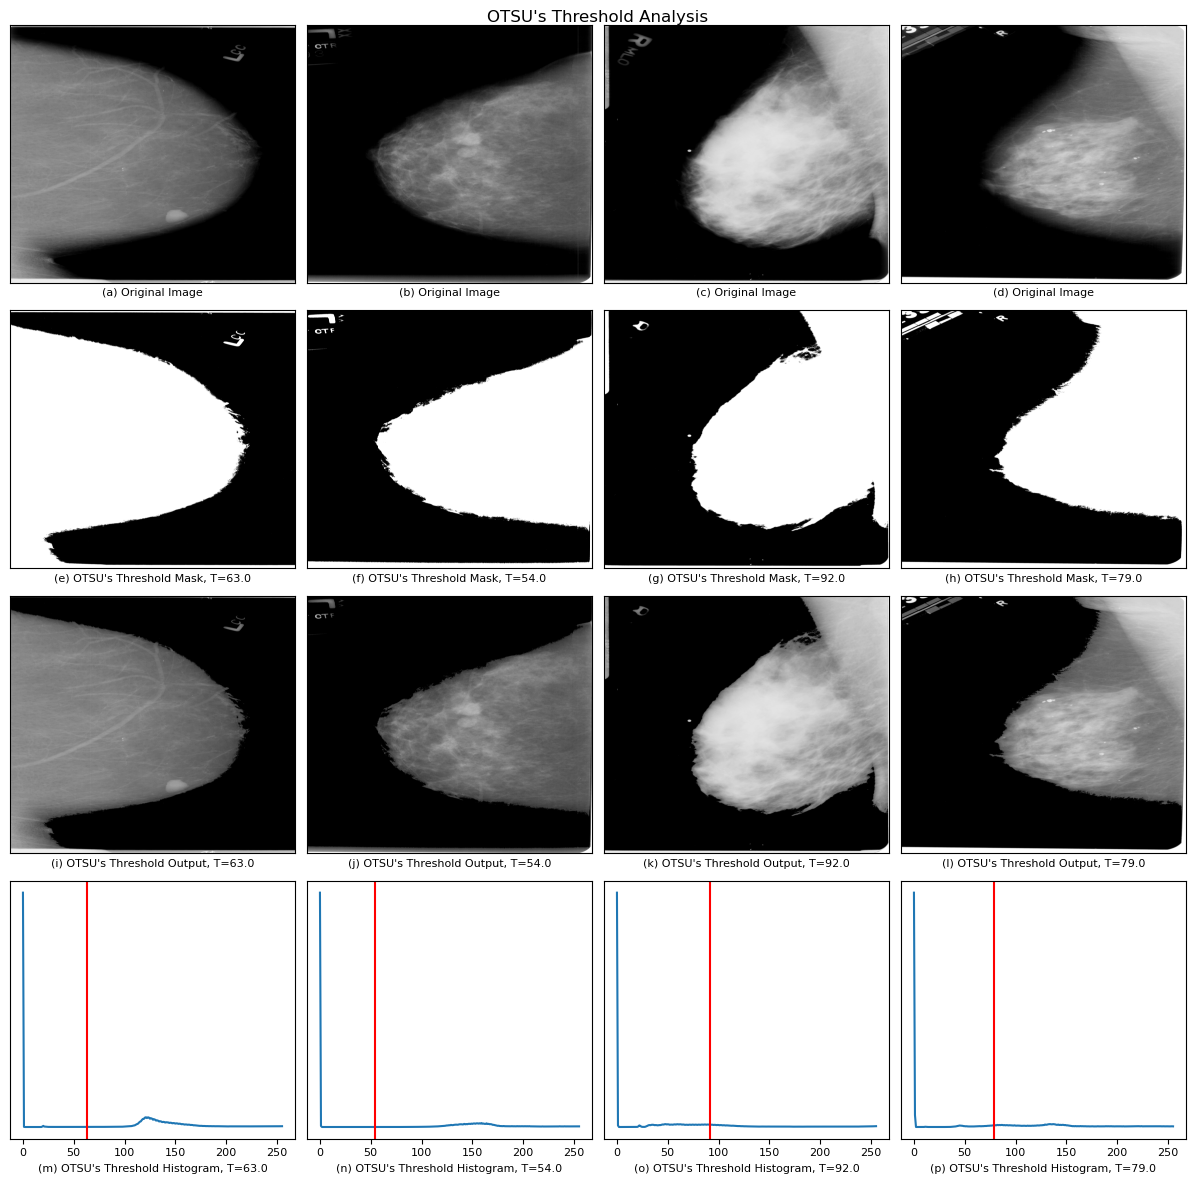

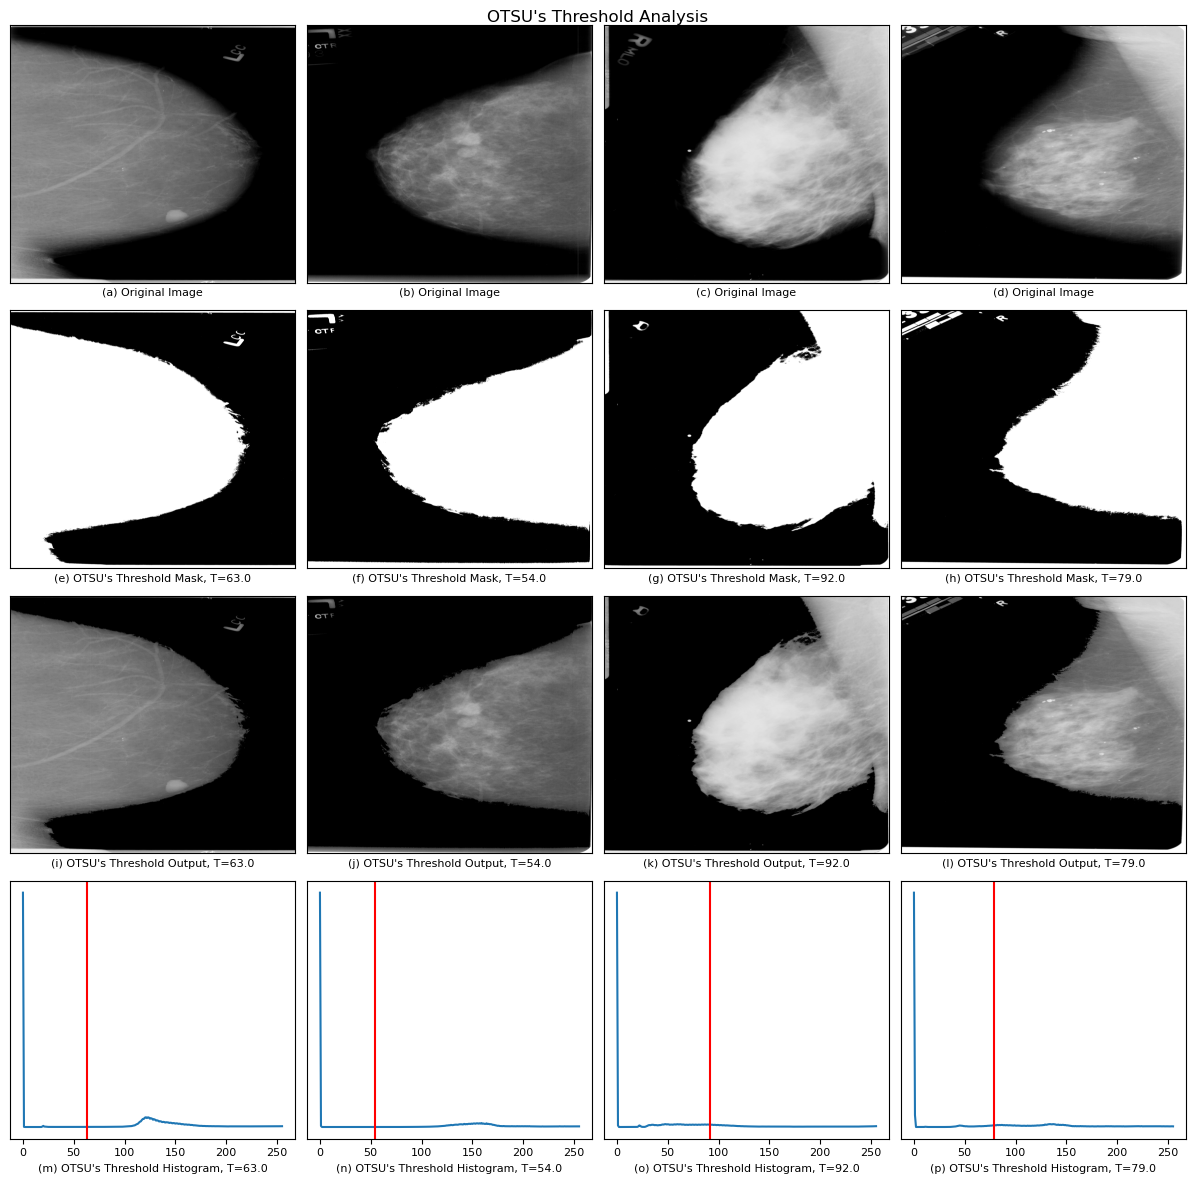

In [5]:
analyzer = ThresholdAnalyzer()
threshold = ThresholdOTSU()
fig = analyzer.analyze(images=images, threshold=threshold)

glue("threshold_otsu", fig)

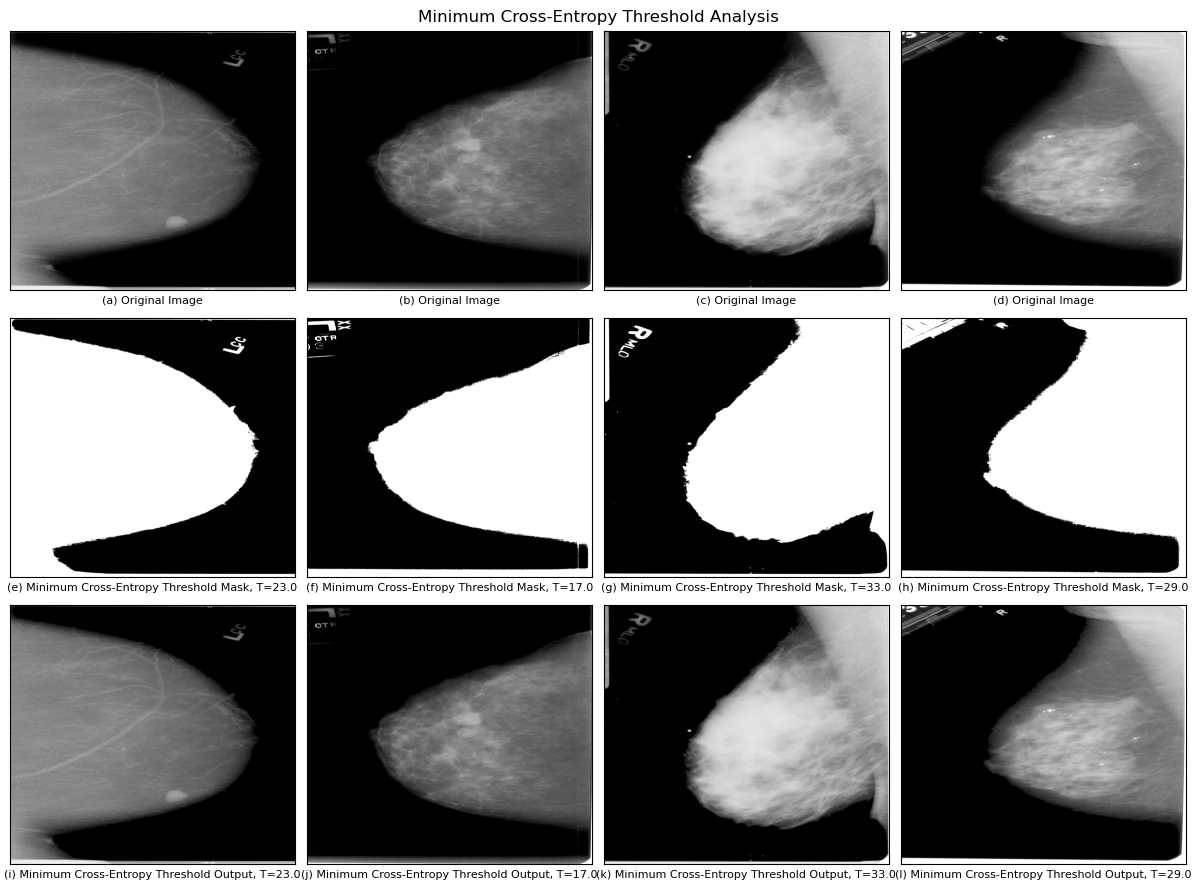

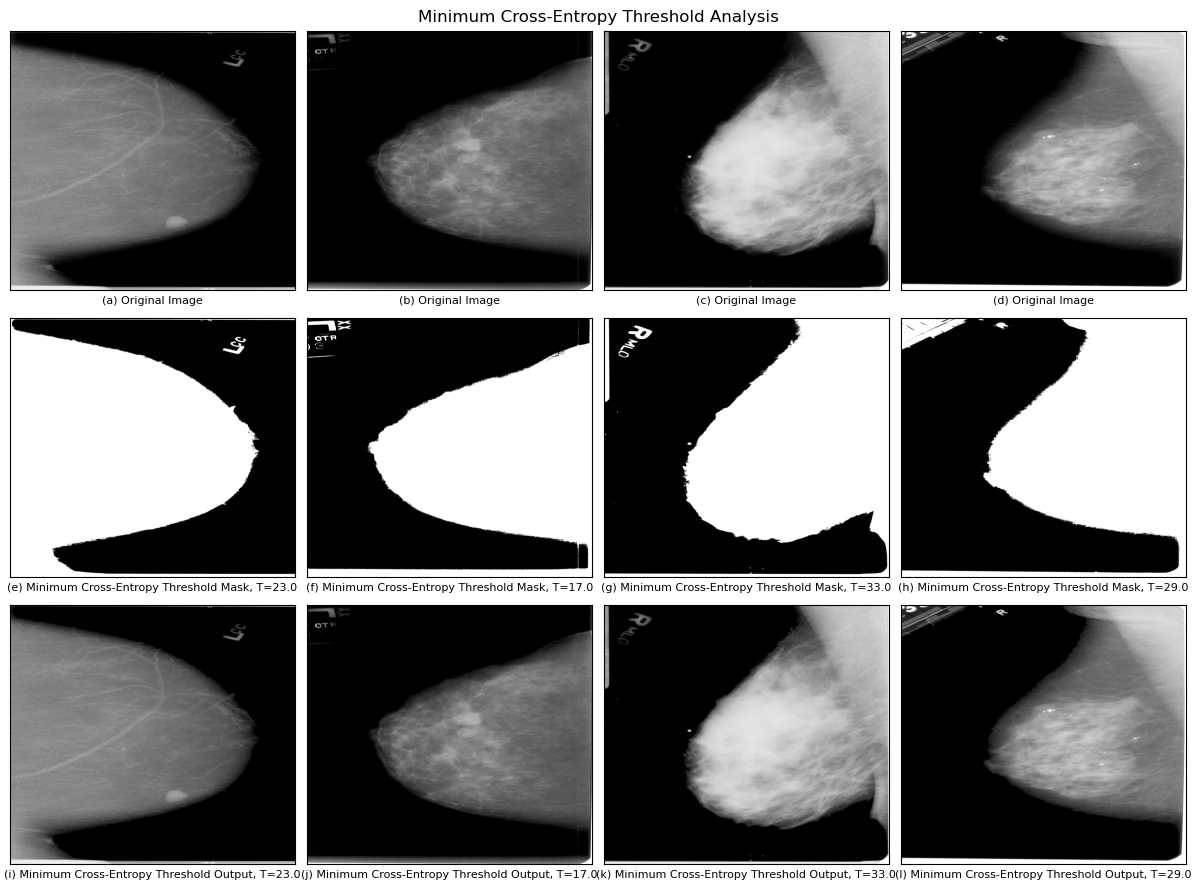

In [6]:
analyzer = ThresholdAnalyzer(show_histograms=False)
threshold = ThresholdLi()
fig = analyzer.analyze(images=images, threshold=threshold)

glue("threshold_li", fig)

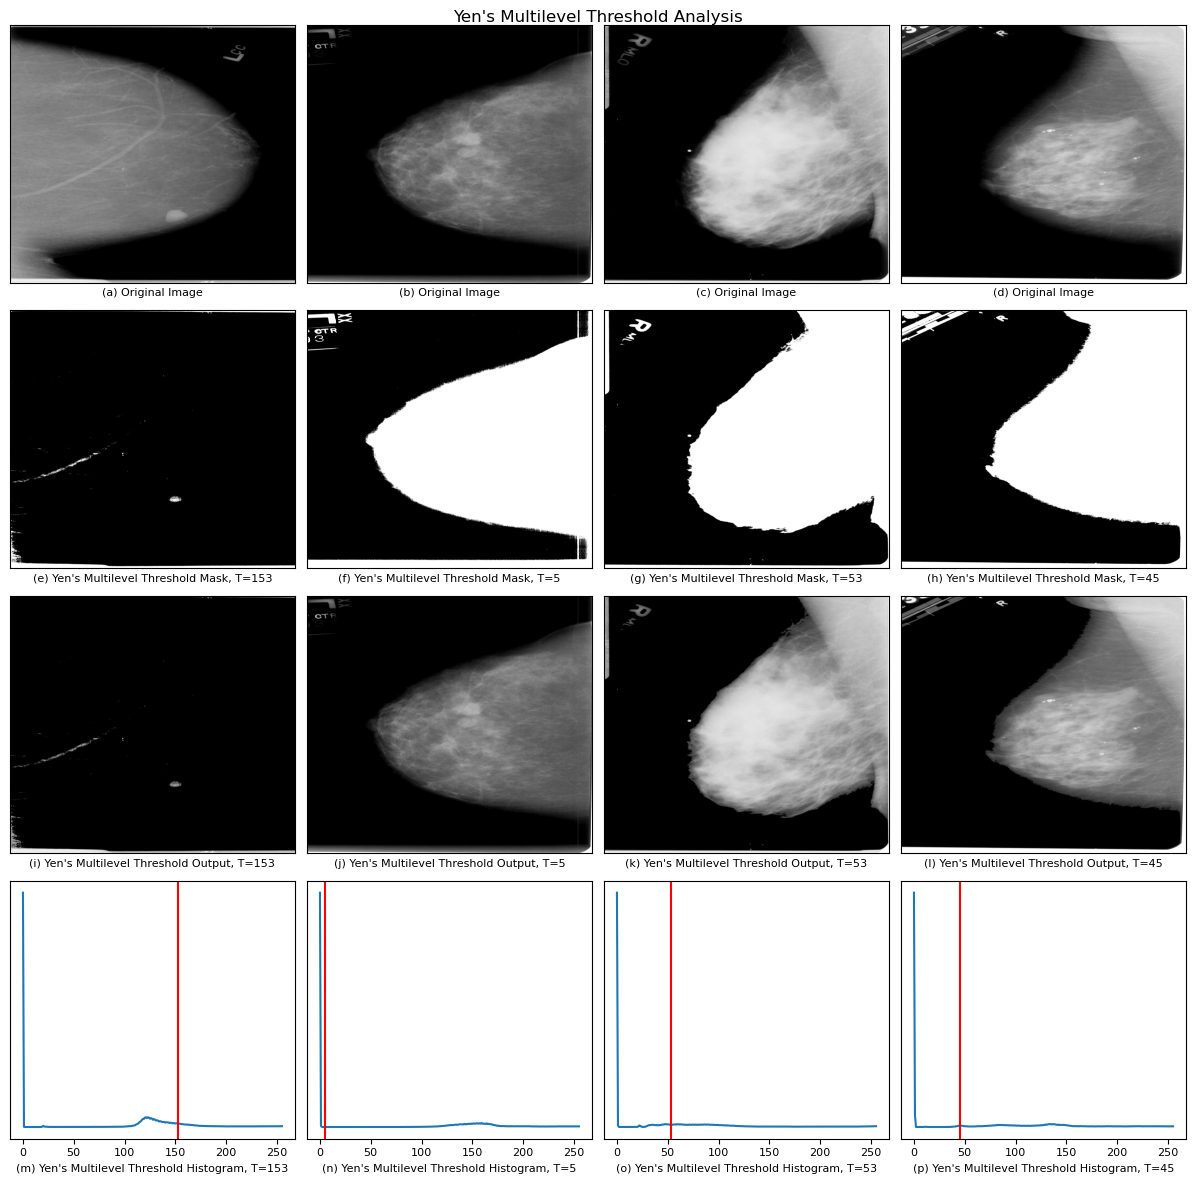

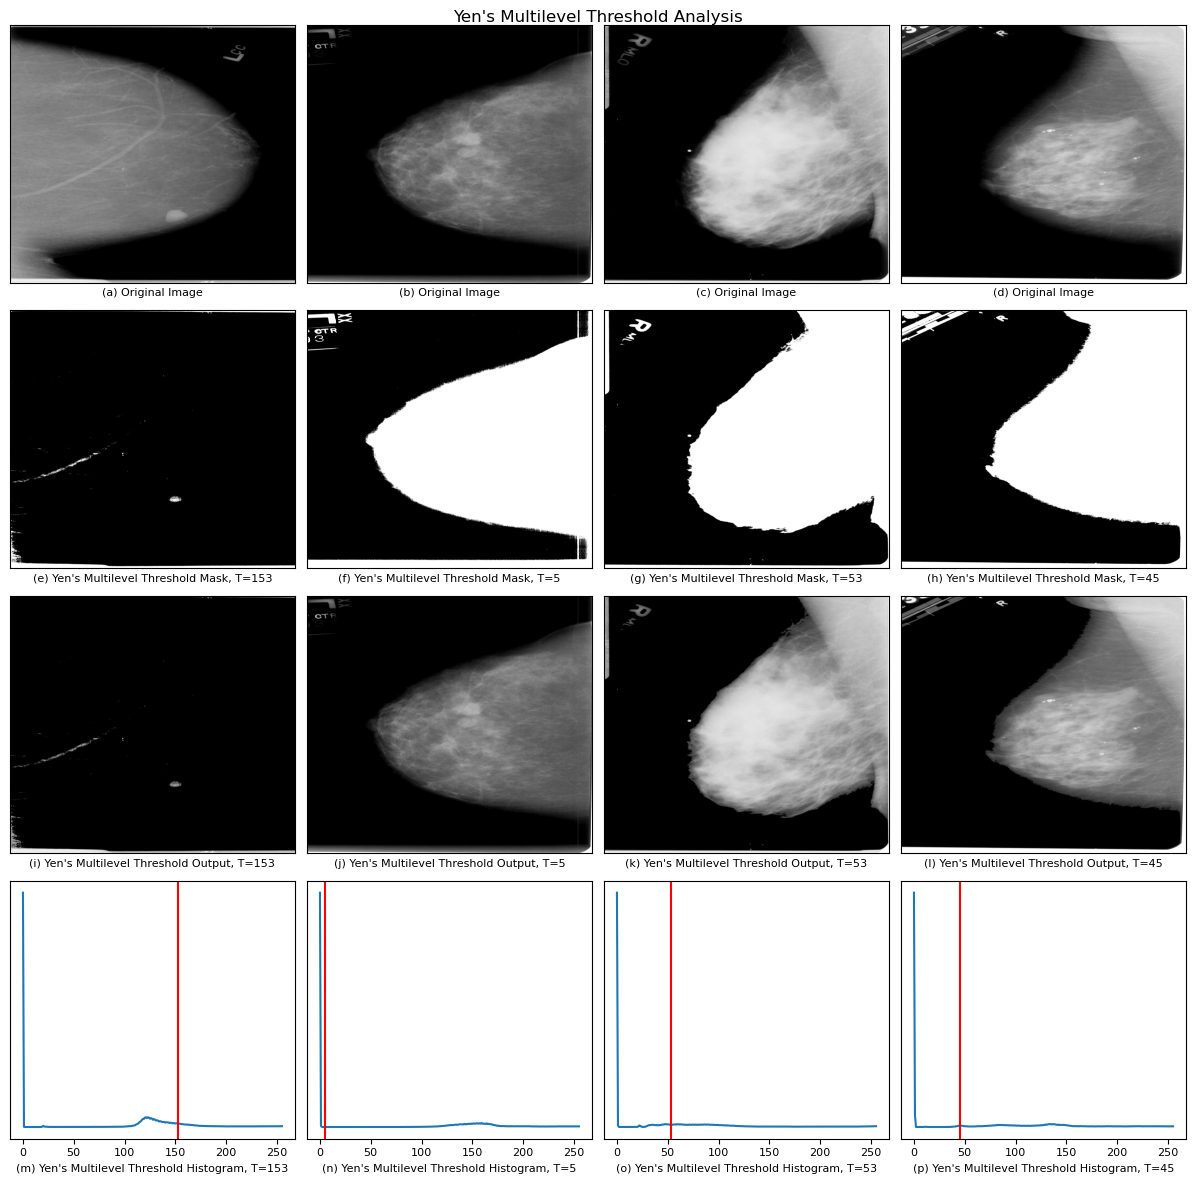

In [7]:
analyzer = ThresholdAnalyzer()
threshold = ThresholdYen()
fig = analyzer.analyze(images=images, threshold=threshold)

glue("threshold_yen", fig)